In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/Users/clairewest/UIUC/Research/Codes')


from temperature_analytics import CalculateTemperatures
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display, Math


# Verify that my codes match with Baffou
They match!! I compared from his 2012 paper with uniform circular illumination and with his recent Anti-Stokes paper with Gaussian illumination. Essentially a perfect match!



The following verifies the temperature measured and calculated in Figure 5 of https://doi.org/10.1021/nn401924n.

### Temperature of a single NP in system

In [3]:
mean_abs_cross_sect = 810 * (1E-3)**2 # um^2 
k_avg = (1.38 + 0.6) / 2 # W / (m K)
R = 11.43E-9 # m
P0 = 17.9*1E-3 # W
D = 24.3*1E-6 # m

temp_analy = CalculateTemperatures(abs_cross=mean_abs_cross_sect, 
                                      kappa=k_avg, 
                                      radius=R,
                                      P0=P0)

I0 = temp_analy.intens_at_centerofbeam(which_inten='uni_circular', D=D)
P_j = temp_analy.P_j(I0=I0)
T_j = temp_analy.T_j_singleNP(P_j=P_j)
display(Math(r'\Delta T_j = {}  \, ^\circ \mathrm C'.format(round(T_j,2)))) 

<IPython.core.display.Math object>

### Define NP positions
Here the NPs are in a hexagonal array.

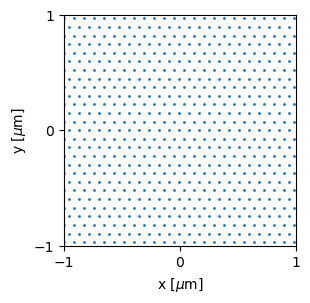

In [8]:
window_size = 150*1E-6  # m
interpart_dist =  86*1E-9  # m

r, r_cen = temp_analy.hexagonal_array(wind_size=window_size, 
                                     intpart_dist=interpart_dist)

fig, ax = plt.subplots(1,1, figsize=[3,3])
ax.scatter(r[:,0]*1E6, r[:,1]*1E6, s=1)
# ax.scatter(r[r_cen,0], r[r_cen,1], s=500, c='pink', marker='*')
ax.set_xlim([-1, 1]);
ax.set_ylim([-1, 1]);
ax.set_xlabel('x [$\mu$m]')
ax.set_ylabel('y [$\mu$m]')
ax.set_xticks([-1,0,1]);
ax.set_yticks([-1,0,1]);

# ax.axis('equal'); 

In [9]:
threshold = D 

# The temperature at the center

T_self, T_ext, T_tot = temp_analy.T_tot_at_j(j=r_cen, r=r, which_inten='gauss', gauss_xy0=[0,0], w0=)

print(T_tot, np.sum(T_ext), T_self)


30.049917223529572 29.83005818101788 0.21985904251169458


In [6]:

abs_cross = mean_abs_cross_sect*(1E-6)**2
I = 4*P0 / (np.pi*(D)**2)
p = interpart_dist
A = np.sqrt(3) * p**2 / 2

T0_ext_infinite = abs_cross * I / k_avg * 1/4 * D / A * (1 - 2*np.sqrt(A)/(np.sqrt(np.pi)*D))

print('T =', "{:.1F}".format(T0_ext_infinite), "C")

T = 29.8 C


In [7]:
if len(r) <= 1E4:
    
    T_tot_atj = np.zeros(num_part)

    for j in range(num_part):
        rj = r[j,:]
        rj_tile = np.tile(rj, (r.shape[0], 1))
        rj_minus_rk = np.linalg.norm(r - rj, axis=-1)
        rj_minus_rk_jneqk = np.delete(rj_minus_rk, j)

        ## Has to be in for loop because 'delete'
        weight = np.linalg.norm(r, axis=-1) - threshold
        weight[weight>0] = 0
        weight[weight<0] = 1

        ### Particle due to absorption at j
        I0 = 4*P0 / (np.pi*(D)**2) # W / m^2
        P_j = mean_abs_cross_sect*(1E-6)**2 * I0
        T_j = P_j*weight[j]  / (4 * np.pi * k_avg * R)

        ### Particles k neq j
        weight = np.delete(weight, j)
        P_k = P_j * weight
        T_ks = P_k/(4*np.pi*k_avg*rj_minus_rk_jneqk)
        T_tot_atj[j] = T_j + np.sum(T_ks)


    fig, ax = plt.subplots(1, 1, figsize=[10,10])

    im = ax.scatter(X.ravel()*1E6, Y.ravel()*1E6, c=T_tot_atj, s=50, cmap='jet',
                   vmin=np.min(T_tot_atj), vmax=np.max(T_tot_atj),
                   )
    
    ax.set_xlabel('$x$ [$\mu$m]')
    ax.set_ylabel('$y$ [$\mu$m]')

    divider = make_axes_locatable(ax)
    cax_ij = divider.append_axes("right", size="5%", pad=0.05)
    cbarij = plt.colorbar(im, cax=cax_ij,label='$\Delta T \,\,$[$^\circ$C]')


## And verify Gaussian illumination works too by checking with Anti-Stokes paper

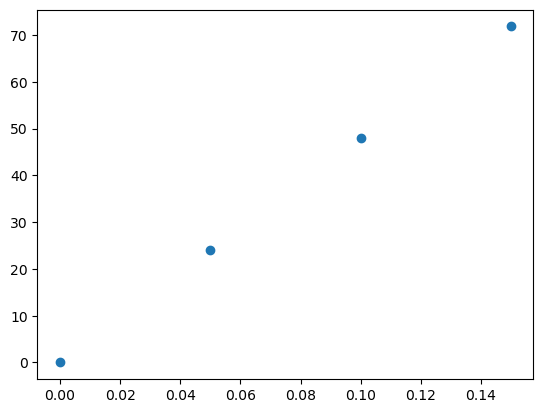

In [18]:
mean_abs_cross_sect_65 = 3252 * (1E-3)**2 # um^2 
mean_abs_cross_sect_100 = 21514 * (1E-3)**2 # um^2 
mean_abs_cross_sect_157 = 8473 * (1E-3)**2 # um^2 

k_avg = 0.8 # W / (m K)
R_65 = 33.24E-9 # m
R_100 = 45.77E-9
R_157 =  65.39E-9

his_intensities = np.array([0, 0.05, 0.1, 0.15]) # mW/um^2
his_fwhm = 18 # um
powers = his_intensities * np.pi * his_fwhm**2 / (4 * np.log(2)) # mW

window_size = 40*1E-6  # m
interpart_dist =  350.*1E-9  # m

pi = 1
for pi in range(4):

    temp_analy = CalculateTemperatures(abs_cross=mean_abs_cross_sect_157, 
                                          kappa=k_avg, 
                                          radius=R_157,
                                          P0=powers[pi]*1E-3)

    r, r_cen = temp_analy.hexagonal_array(wind_size=window_size, 
                                         intpart_dist=interpart_dist)


    T_self, T_ext, T_tot = temp_analy.T_tot_at_j(j=r_cen, 
                                                 r=r, 
                                                 which_inten='gauss', 
                                                 gauss_xy0=[0,0], 
                                                 w0=his_fwhm*1E-6/np.sqrt(2*np.log(2)))
    plt.scatter(his_intensities[pi], T_tot, color='tab:blue')